In [97]:
from numpy import * 
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
#0.81

In [98]:
X_train = pd.read_csv("train.csv")
Y_train = X_train.pop("label").values
X_train = X_train.values

In [5]:
Y_train.shape

(42000,)

In [6]:
indices_0_1 = []
for i in range(len(Y_train)):
    if(Y_train[i]==1 or Y_train[i]==0):
        indices_0_1.append(i)

In [10]:
indices_0_1 = array(indices_0_1)

In [13]:
indices_0_1.shape

(8816,)

In [15]:
matrix_0_1 = euclidean_distances(X_train[indices_0_1], X_train[indices_0_1])

In [30]:
m, n = matrix_0_1.shape


In [58]:
dis_same = []
dis_diff = []

for i in range(m):
    for j in range(n):
        if(i<j and Y_train[indices_0_1[i]]!=Y_train[indices_0_1[j]]):
            dis_diff.append(matrix_0_1[i][j])
        if(i<j and Y_train[indices_0_1[i]]==Y_train[indices_0_1[j]]):
            dis_same.append(matrix_0_1[i][j])
        


In [59]:
dis_same = array(dis_same)
dis_diff = array(dis_diff)

In [60]:
dis_same.shape

(19502232,)

In [61]:
dis_diff.shape

(19354288,)

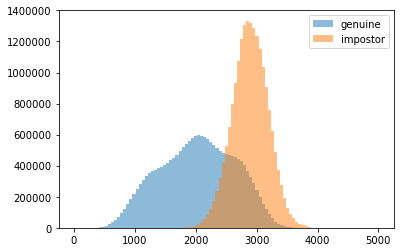

In [62]:
from matplotlib import pyplot
bins = linspace(0, 5000, 100)

pyplot.hist(dis_same, bins, alpha=0.5, label='genuine')
pyplot.hist(dis_diff, bins, alpha=0.5, label='impostor')
pyplot.legend(loc='upper right')
pyplot.show()

In [74]:
def compute_rate(dis):
    return array([[sum(dis_same<dis)/len(dis_same), sum(dis_diff<dis)/len(dis_diff)]])         

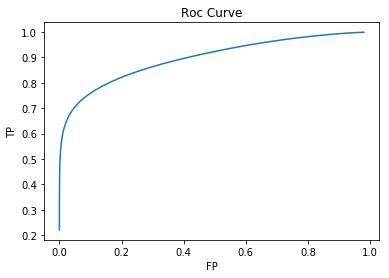

In [78]:

Roc_points = empty((0,2))
test_dis = 1500
for i in range(100):
    Roc_points = append(Roc_points, compute_rate(test_dis+20*i), axis = 0)
plt.plot(Roc_points[:,1], Roc_points[:,0])
plt.title('Roc Curve')
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()

In [96]:
test_dis = 1500
for i in range(200):
    tmp = compute_rate(test_dis+10*i)
    #print(abs(-tmp[0][1]+1-tmp[0][0]))
    if(abs(-tmp[0][1]+1-tmp[0][0])<0.005):
        print(tmp[0][0])
    
    
    

0.813018274011


In [71]:
sum(dis_same<2000)

9251584

In [83]:
compute_rate(test_dis+20*i)

0.99933094837555003

In [100]:
sum(Y_train ==1)/(sum(Y_train ==1)+sum(Y_train ==0))

0.5313067150635209